In [1]:
int_seal_population = io.load('int_seal_population')
int_seal_population

2019-06-28 03:07:28,841 - kedro.io.data_catalog - INFO - Loading data from `int_seal_population` (CSVLocalDataSet)...


,Year,Seal Population (Thousands)
0,1997,3.493
1,1998,5.282
2,1999,6.357
3,2000,9.201
4,2001,11.224
5,2002,12.964
6,2003,16.226
7,2004,18.137
8,2005,19.590
9,2006,21.955


Let $x$ represent time in years starting with $x$ = 0 for the year 1997.  Let $y$ represent the number of seals in thousands.

In [2]:
import pandas as pd


xdata = int_seal_population.Year - 1997
ydata = int_seal_population['Seal Population (Thousands)']
pd.DataFrame({'x': xdata, 'y': ydata})

,x,y
0,0,3.493
1,1,5.282
2,2,6.357
3,3,9.201
4,4,11.224
5,5,12.964
6,6,16.226
7,7,18.137
8,8,19.590
9,9,21.955


Use logistic regression to fit a model to these data.

In [3]:
import numpy as np


def func(t, C, k, m):
    r"""Define logistic growth :math:`g(t)=\frac{C}{1+exp(-k(t-m))}`."""
    # pylint: disable=invalid-name
    return C / (1 + np.exp(-k * (t - m)))

The logistic regression model that fits these data is $y=\frac{25.65665979}{1+6.113686306{e}^{-0.3852149008x}}$.<sup>[1]</sup>

1. Source: https://courses.lumenlearning.com/collegealgebra1/chapter/solutions-30/

In [4]:
popt = np.array([25.65665979, 0.3852149008, np.log(6.113686306) / 0.3852149008])
popt

array([25.65665979,  0.3852149 ,  4.70005161])

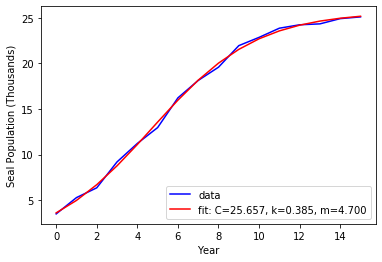

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: C=%5.3f, k=%5.3f, m=%5.3f' % tuple(popt))
plt.xlabel('Year')
plt.ylabel('Seal Population (Thousands)')
plt.legend()

# Ferment Seals

Define the data to be fit with some noise:

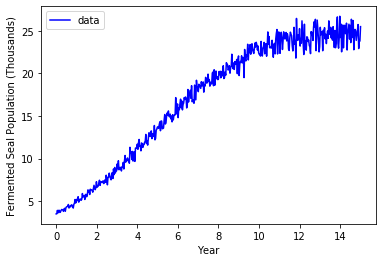

In [6]:
xdata = np.linspace(xdata.min(), xdata.max(), 500)
y = func(xdata, *popt)
np.random.seed(1729)
y_noise = 0.04 * np.random.normal(size=xdata.size)
ydata = y + y_noise * y  # Unequal weighting
plt.plot(xdata, ydata, 'b-', label='data')
plt.xlabel('Year')
plt.ylabel('Fermented Seal Population (Thousands)')
plt.legend()

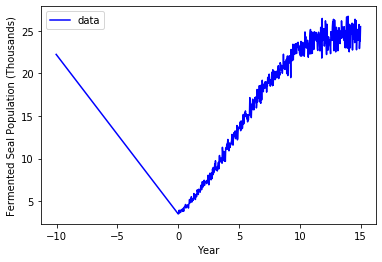

In [7]:
import random


random.seed(1729)
i = random.randrange(xdata.size)
xdata[i] = -xdata[i]
index_array = np.argsort(xdata)
xdata = xdata[index_array]
ydata = ydata[index_array]
plt.plot(xdata, ydata, 'b-', label='data')
plt.xlabel('Year')
plt.ylabel('Fermented Seal Population (Thousands)')
plt.legend()

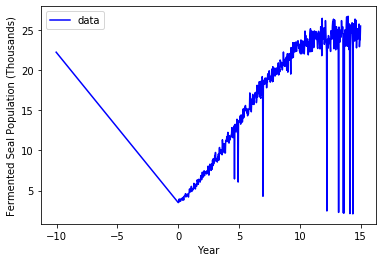

In [8]:
for i in np.random.uniform(100, xdata.size, 10).astype(int):
    ydata[i] = 1000 / i
plt.plot(xdata, ydata, 'b-', label='data')
plt.xlabel('Year')
plt.ylabel('Fermented Seal Population (Thousands)')
plt.legend()

#### Save The (Fermented) Seals

In [9]:
prm_seal_population = pd.DataFrame({'Year': xdata, 'Fermented Seal Population (Thousands)': ydata})
io.save('prm_seal_population', prm_seal_population)
io.load('prm_seal_population')

2019-06-28 03:07:29,861 - kedro.io.data_catalog - INFO - Saving data to `prm_seal_population` (CSVLocalDataSet)...
2019-06-28 03:07:29,867 - kedro.io.data_catalog - INFO - Loading data from `prm_seal_population` (CSVLocalDataSet)...


,Year,Fermented Seal Population (Thousands)
0,-10.040080,22.233980
1,0.000000,3.507502
2,0.030060,3.523078
3,0.060120,3.922211
4,0.090180,3.630186
5,0.120240,3.917598
6,0.150301,3.930257
7,0.180361,3.675354
8,0.210421,3.732614
9,0.240481,3.915168
